# Exploratory Data Analysis

## Set up

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load data file
df = pd.read_csv('terry-clean.csv')
pd.set_option('display.max_columns', 999)
time = df.reported_time
df = df.drop(columns=['go_/_sc_num', 'terry_stop_id', 'officer_id', 'subject_id', 'reported_date',
                      'officer_squad', 'officer_yob', 'precinct', 'sector', 'beat'])
df.head()

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subject_age_group,stop_resolution,weapon_type,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag
0,36 - 45,Arrest,None,M,Black or African American,Asian,Male,11:32:00,-,-,None,N,N
1,18 - 25,Field Contact,None,M,White,Unknown,-,04:55:00,-,-,None,N,N
2,1 - 17,Field Contact,None,M,Hispanic or Latino,Unknown,-,01:06:00,-,-,None,N,N
3,1 - 17,Field Contact,None,M,White,Unknown,-,19:27:00,-,-,None,N,N
4,26 - 35,Field Contact,None,M,White,Unknown,-,19:32:00,-,-,None,N,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40313 entries, 0 to 40312
Data columns (total 13 columns):
subject_age_group           40313 non-null object
stop_resolution             40313 non-null object
weapon_type                 40313 non-null object
officer_gender              40313 non-null object
officer_race                40313 non-null object
subject_perceived_race      40313 non-null object
subject_perceived_gender    40313 non-null object
reported_time               40313 non-null object
initial_call_type           40313 non-null object
final_call_type             40313 non-null object
call_type                   40313 non-null object
arrest_flag                 40313 non-null object
frisk_flag                  40313 non-null object
dtypes: object(13)
memory usage: 4.0+ MB


In [4]:
# Turn time into categories

# Observe the hour
df['reported_time'] = pd.to_datetime(df['reported_time'])
df['hour'] = df['reported_time'].dt.hour
df['watch'] = df['reported_time'].dt.hour

# Create bins
bins = [0, 6, 12, 18, 24]

# Use pd.cut()
bins_time = pd.cut(df.hour, bins, right=False)
print(bins_time)

df.watch = bins_time



0         [6, 12)
1          [0, 6)
2          [0, 6)
3        [18, 24)
4        [18, 24)
           ...   
40308    [12, 18)
40309      [0, 6)
40310     [6, 12)
40311    [18, 24)
40312      [0, 6)
Name: hour, Length: 40313, dtype: category
Categories (4, interval[int64]): [[0, 6) < [6, 12) < [12, 18) < [18, 24)]


# What's in the data?
Let's look at the individual plots for each feature.

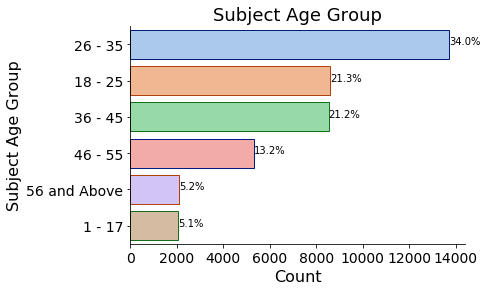

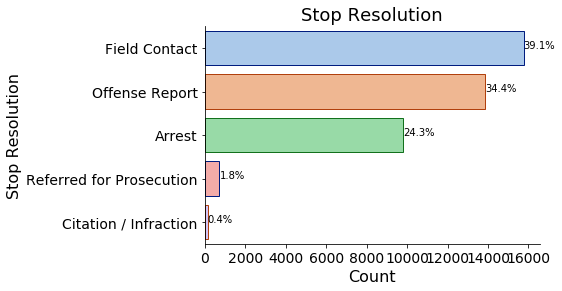

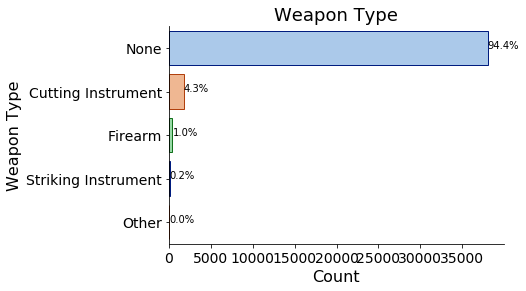

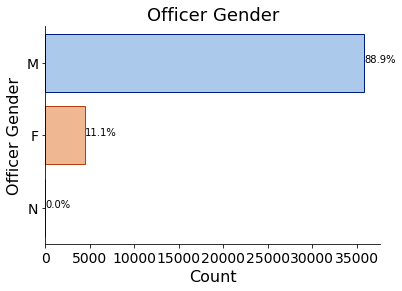

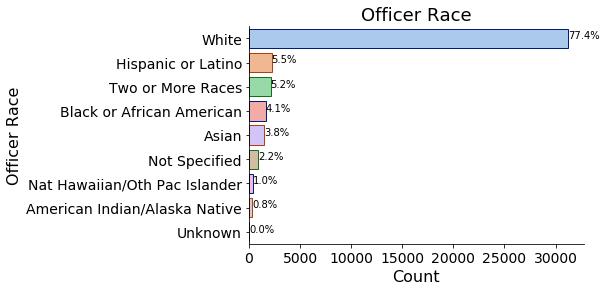

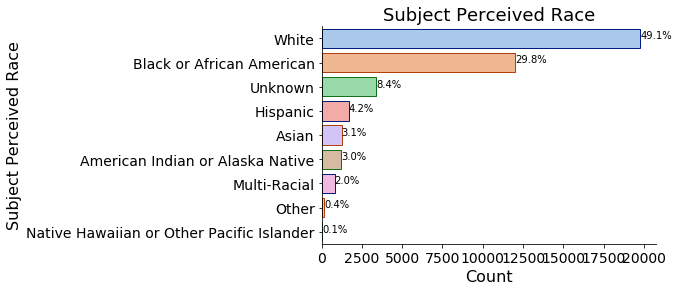

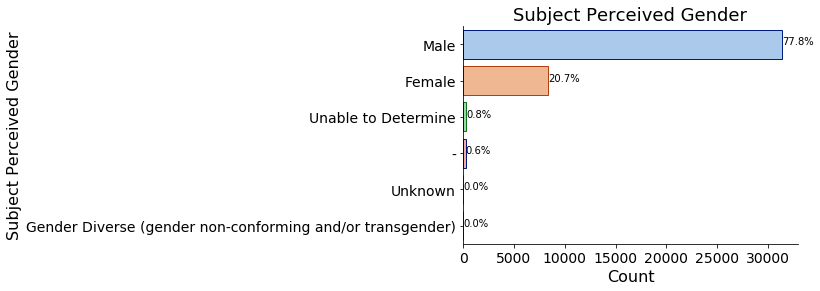

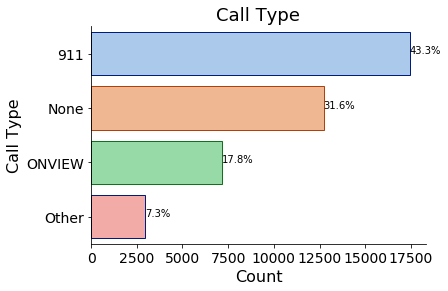

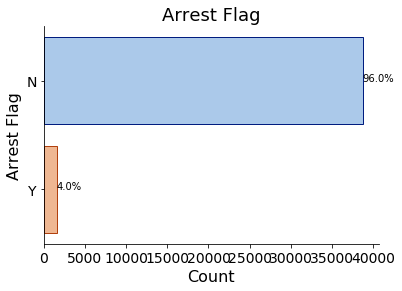

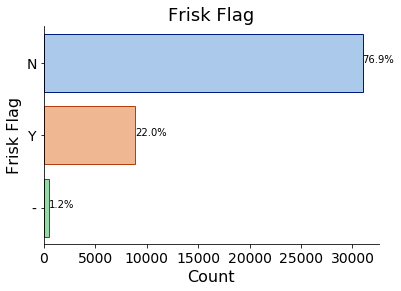

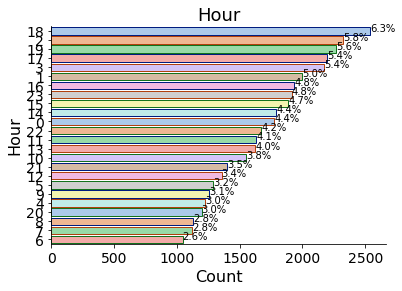

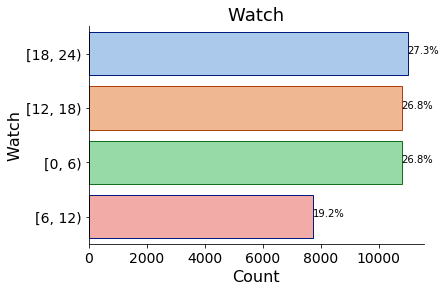

In [5]:

for col in df.drop(columns=['final_call_type', 'initial_call_type', 'reported_time']).columns:
    ax = sns.countplot(y=col, data=df, edgecolor=sns.color_palette("dark", 3), palette='pastel',
                  order = df[col].value_counts().index);
    total = len(df[col])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    title = col.replace('_', ' ').title()
    plt.title(title, fontsize=18)
    plt.ylabel(title, fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.despine(left=False)
    plt.show()


Needed a better plot for the reporting hour

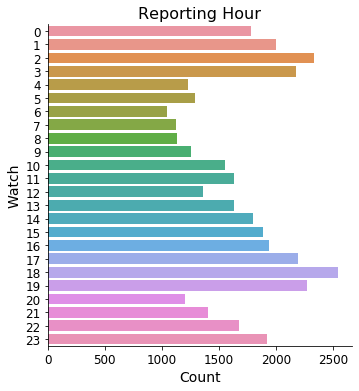

In [9]:
sns.catplot(y='hour', kind="count", data=df);
plt.title('Reporting Hour', fontsize=16)
plt.ylabel(title, fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=False)
plt.show()

## Data Summary
The largest group sections:
* Age group: 26 - 35 (34%)
* Stop Resolution: Field Contact (39.1%)
* Weapon type: None (94.4%)
* Officer gender: Male (88.9%)
* Officer race: White (77.4%)
* Subject perceived race: White (49.1%)
* Subject perceived gender: Male (77.8%)
* Call type: 911 (43.3%)
* Arrest flag: No (96.0%)
* Frisk flag: No (76.9%)
* Watch: 6-Midnight (27.3%)
* Hour: 6 pm (6.3%)